# Análisis de Componentes Principales y Clustering

## OBJETIVO: Predecir el anio de termino de construccion con las variables del df
### CAMILA VERA VILLA


## 1.- Importe las librerías correspondientes junto con el conjunto de datos
* Necesitará el método `pd.read_excel` para poder ingerir los datos en formato `xlsx`.
* El argumento `skiprows` le permite indicarle al lector que salte las primeras `n` líneas del archivo a leer
* Recuerde definir una variable que sirva como semilla aleatoria!.

In [7]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#statmodels para generar modelos de regresio
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

#sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

seed = 17955

In [13]:
#carga del data set

df= pd.read_excel('Residential-Building-Data-Set.xlsx')
df.head()

,PROJECT DATES (PERSIAN CALENDAR),Unnamed: 1,Unnamed: 2,Unnamed: 3,PROJECT PHYSICAL AND FINANCIAL VARIABLES,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,OUTPUTS,Unnamed: 108
0,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
1,81,1,85,1,1,3150,920,598.5,190,1010.84,...,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
2,84,1,89,4,1,7600,1140,3040,400,963.81,...,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
3,78,1,81,4,1,4800,840,480,100,689.84,...,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170
4,72,2,73,2,1,685,202,13.7,20,459.54,...,152.25,1442.31,1456,9.73,8.34,686.16,8194,122032,165,30


In [14]:
#aplicar el argumento skiprows para saltar la primera linea del dataset

df= pd.read_excel('Residential-Building-Data-Set.xlsx',skiprows=1)
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


In [15]:
df.df.loc[:,:'V-29'] #tomar las columnas hasta v-29

AttributeError: 'DataFrame' object has no attribute 'df'

In [11]:
df.describe()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,...,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,81.483871,2.190860,82.951613,2.586022,9.728495,1729.044355,426.114247,327.904086,163.118280,554.419839,...,1187.484704,5403.213091,7431.560215,76.288817,73.446398,5915.576801,27551.883065,8.789713e+05,1387.432796,232.647849
std,4.182141,1.083382,4.223898,1.123442,6.563309,1802.371491,490.076498,563.544337,112.604343,275.105953,...,708.139788,3534.428753,2210.892779,39.507185,43.726005,4282.641116,13516.283345,5.067320e+05,1206.083047,162.627656
min,72.000000,1.000000,73.000000,1.000000,1.000000,200.000000,60.000000,3.700000,10.000000,193.080000,...,152.250000,1439.000000,1450.000000,9.730000,8.340000,354.550000,8194.000000,1.218572e+05,50.000000,20.000000
25%,78.000000,1.000000,80.000000,2.000000,4.000000,720.000000,190.000000,67.800000,80.000000,391.677500,...,669.800000,1755.000000,6714.000000,43.400000,36.450000,1917.437500,12065.000000,5.196798e+05,577.500000,110.000000
50%,82.000000,2.000000,84.000000,3.000000,8.000000,1220.000000,300.000000,164.700000,140.000000,522.455000,...,938.400000,7927.570000,8315.000000,72.565000,67.455000,4525.370000,25758.750000,6.592429e+05,1000.000000,190.000000
75%,85.000000,3.000000,87.000000,4.000000,17.000000,2100.000000,490.500000,366.050000,230.000000,667.905000,...,1795.300000,9000.910000,9022.000000,109.020000,112.000000,9821.000000,40234.000000,1.181856e+06,1700.000000,330.000000
max,88.000000,4.000000,90.000000,4.000000,20.000000,15670.000000,5000.000000,7208.200000,640.000000,3436.930000,...,3686.300000,9967.330000,10099.300000,190.500000,204.800000,13596.370000,49572.000000,2.435004e+06,6800.000000,1000.000000


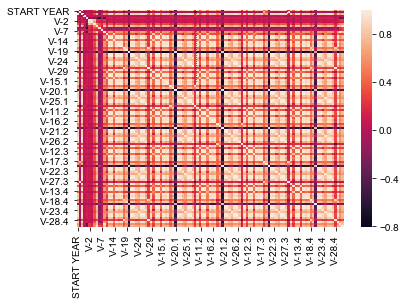

In [12]:
import seaborn as sn
sn.heatmap(df.corr())
# graficos
plt.style.use('seaborn') 
plt.rcParams["figure.figsize"] = (20, 20) # Tamaño 
plt.rcParams["figure.dpi"] = 100 # resolución

## 2.- Data Wrangling & Feature Engineering
1. Elimine las columnas `START QUARTER` y `COMPLETION QUARTER`, por ahora las ignoraremos para nuestro análisis.

Nuestro primer objetivo será realizar una transformación/extracción de las componentes principales de la matriz de datos, el objetivo de esto es encontrar aquellas componentes principales que permiten explicar un cierto porcentaje de la variación total de los datos.

2. Sabiendo que PCA en rigor solo debiese ser aplicado a variables numéricas de rango (recordar la diferencia entre variables ordinales y nominales), realice un split entrenamiento y test, apartando un conjunto de test correspondiente al 30$%$ de la muestra. Considere que nuestra variable objetivo va a ser `COMPLETION YEAR`. Lo que haremos con el conjunto de train será pasarlo por la transformación PCA.
> * _Observación:_ En mi caso particular, creo que prefiero dejar la dimensión de `START YEAR` fuera de la transformación pues la considero una variable más que todo ordinal.
3. Antes de pasar el conjunto de datos, elimine todos los registros en los que `START YEAR` o `COMPLETION YEAR` es NaN.

4. Escale la matriz de datos con la que se entrenará la transformación. Recuerde: Nunca debemos entrenar la transformación con todos los datos del dataset, de lo contrario, estaríamos pasando información del conjunto de test al modelo.
> a. Instancie un objeto `StandarScaler` y entrenelo con el conjunto de entrenamiento
>
> b. Cree una nueva variable y asignele la transformación del conjunto de entrenamiento pasado por `StandarScaler`.
>
> c. Cree una nueva variable y asignele la transformación del conjunto de test pasado por `StandarScaler`.

5. Transforme la matriz de atributos mediante PCA, para esto, realice los siguientes pasos:
> a. Instancie un objeto `PCA` y entrenelo con la matriz de datos escalada __de entrenamiento__. Dentro de los argumentos del método, indique que requiere un número de componentes igual al $0.99$ de la variación total de los datos, además, indique `svd_solver = "full"`.
>
> b. Cree una nueva variable y asignele la transformación del conjunto de entrenamiento pasado por `PCA`.
>
> c. Cree una nueva variable y asignele la transformación del conjunto de test pasado por `PCA`.


In [ ]:
df.head()

In [16]:
#Eliminar las columnas START QUARTER y COMPLETION QUARTER

lista_drop  = ['START QUARTER','COMPLETION QUARTER']
df = df.drop(lista_drop, axis=1) 
df.head()

,START YEAR,COMPLETION YEAR,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,85,1,3150.0,920.0,598.5,190,1010.84,16,1200,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,89,1,7600.0,1140.0,3040.0,400,963.81,23,2900,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,81,1,4800.0,840.0,480.0,100,689.84,15,630,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,73,1,685.0,202.0,13.7,20,459.54,4,140,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,90,1,3000.0,800.0,1230.0,410,631.91,13,5000,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


In [17]:
df.shape

(372, 107)

In [18]:
#Eliminar los na
df.dropna(inplace = True)

In [21]:
#segmentacion de los datos

x_train_pre, x_test_pre, y_train, y_test = train_test_split(df.loc[:, df.columns != 'COMPLETION YEAR'],df['COMPLETION YEAR'], test_size=.3, random_state= seed)


In [23]:
x_train_pre.head()

,START YEAR,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
226,79,12,230.0,60.0,18.4,80,460.02,10,350,4072.0,...,652.2,1755.00,8315.0,49.92,40.26,1718.90,10058.5,540680.6,560,110
234,83,13,520.0,140.0,78.0,150,466.12,7,1200,3561.0,...,1203.3,8271.46,8325.0,85.37,82.89,8993.00,22417.5,833494.6,1500,220
279,75,17,1750.0,300.0,52.5,30,400.73,10,130,2309.0,...,345.3,1750.00,2818.0,19.49,14.20,694.38,34738.0,410490.1,240,60
212,74,11,600.0,160.0,12.0,20,392.14,6,110,2028.0,...,288.6,1750.00,2687.0,17.23,13.37,562.83,26053.5,279532.2,180,60
153,79,6,840.0,220.0,100.8,120,690.02,6,770,4072.0,...,652.2,1755.00,8315.0,49.92,40.26,1718.90,10058.5,540680.6,1000,130


In [24]:
x_train_pre.shape

(260, 106)

In [25]:
x_test_pre.shape

(112, 106)

In [26]:
#estandarizar matriz de atributos

x_train_numeric = x_train_pre.loc[:, x_train_pre.columns != 'START YEAR']
x_test_numeric = x_test_pre.loc[:, x_test_pre.columns != 'START YEAR']

std_scaler = StandardScaler().fit(x_train_numeric)
x_numeric_scaled_train = std_scaler.transform(x_train_numeric)
x_numeric_scaled_test = std_scaler.transform(x_test_numeric)


## 3.- Estudio de las componentes encontradas

1. Si decidió dejar la columna `START YEAR` fuera de la transformación, ahora agreguela como una nueva columna a las matrices de datos transformadas del punto anterior.

2. Ralice un gráfico de barras donde se muestre:
> a. En orden decreciente, la variación explicada por cada componente principal.
>
> b. La variación explicada acumulada a medida que se agregan componentes principales.

__Nota:__ Es normal que la curva de variación explicada no parta de 0.

Necesitará llamar a los argumentos `components_` y `explained_variance_`.


In [27]:
#nota: siempre estandrizar los datos antes de aplicar PCA

pca_transform = PCA(
        n_components = .99,
        svd_solver = 'full').fit(x_numeric_scaled_train) #devuelve el 99% de la variacion

In [28]:
x_numeric_pca_train = pca_transform.transform(x_numeric_scaled_train)
x_numeric_pca_test = pca_transform.transform(x_numeric_scaled_test)

In [29]:
x_numeric_scaled_train.shape

(260, 105)

In [30]:
x_numeric_pca_train   # no es un nuevo dataframe, son nuevas columnas combinaciones de las anteriores

array([[ -6.69031228,   0.32338083,  -0.15286107, ...,   0.58310924,
          0.21483939,   0.31911795],
       [  0.24460701,  -3.15933496,   0.75296991, ...,   0.21010221,
         -0.25068473,  -0.06722504],
       [-10.81957594,   0.05668967,   0.82594423, ...,  -0.10904416,
         -0.20513455,  -0.03573667],
       ...,
       [  7.43392164,  -1.55750435,  -1.31729425, ...,  -0.13116068,
         -0.55857329,  -0.01920754],
       [ -4.49740026,   3.34347035,  -2.76743781, ...,   0.30637587,
         -0.19180068,  -0.40574327],
       [ 13.96810325,   2.8280959 ,  -2.68285006, ...,  -0.38747322,
         -0.18920952,  -0.0803389 ]])

In [31]:
x_numeric_scaled_train.shape[1] - x_numeric_pca_train.shape[1]

81

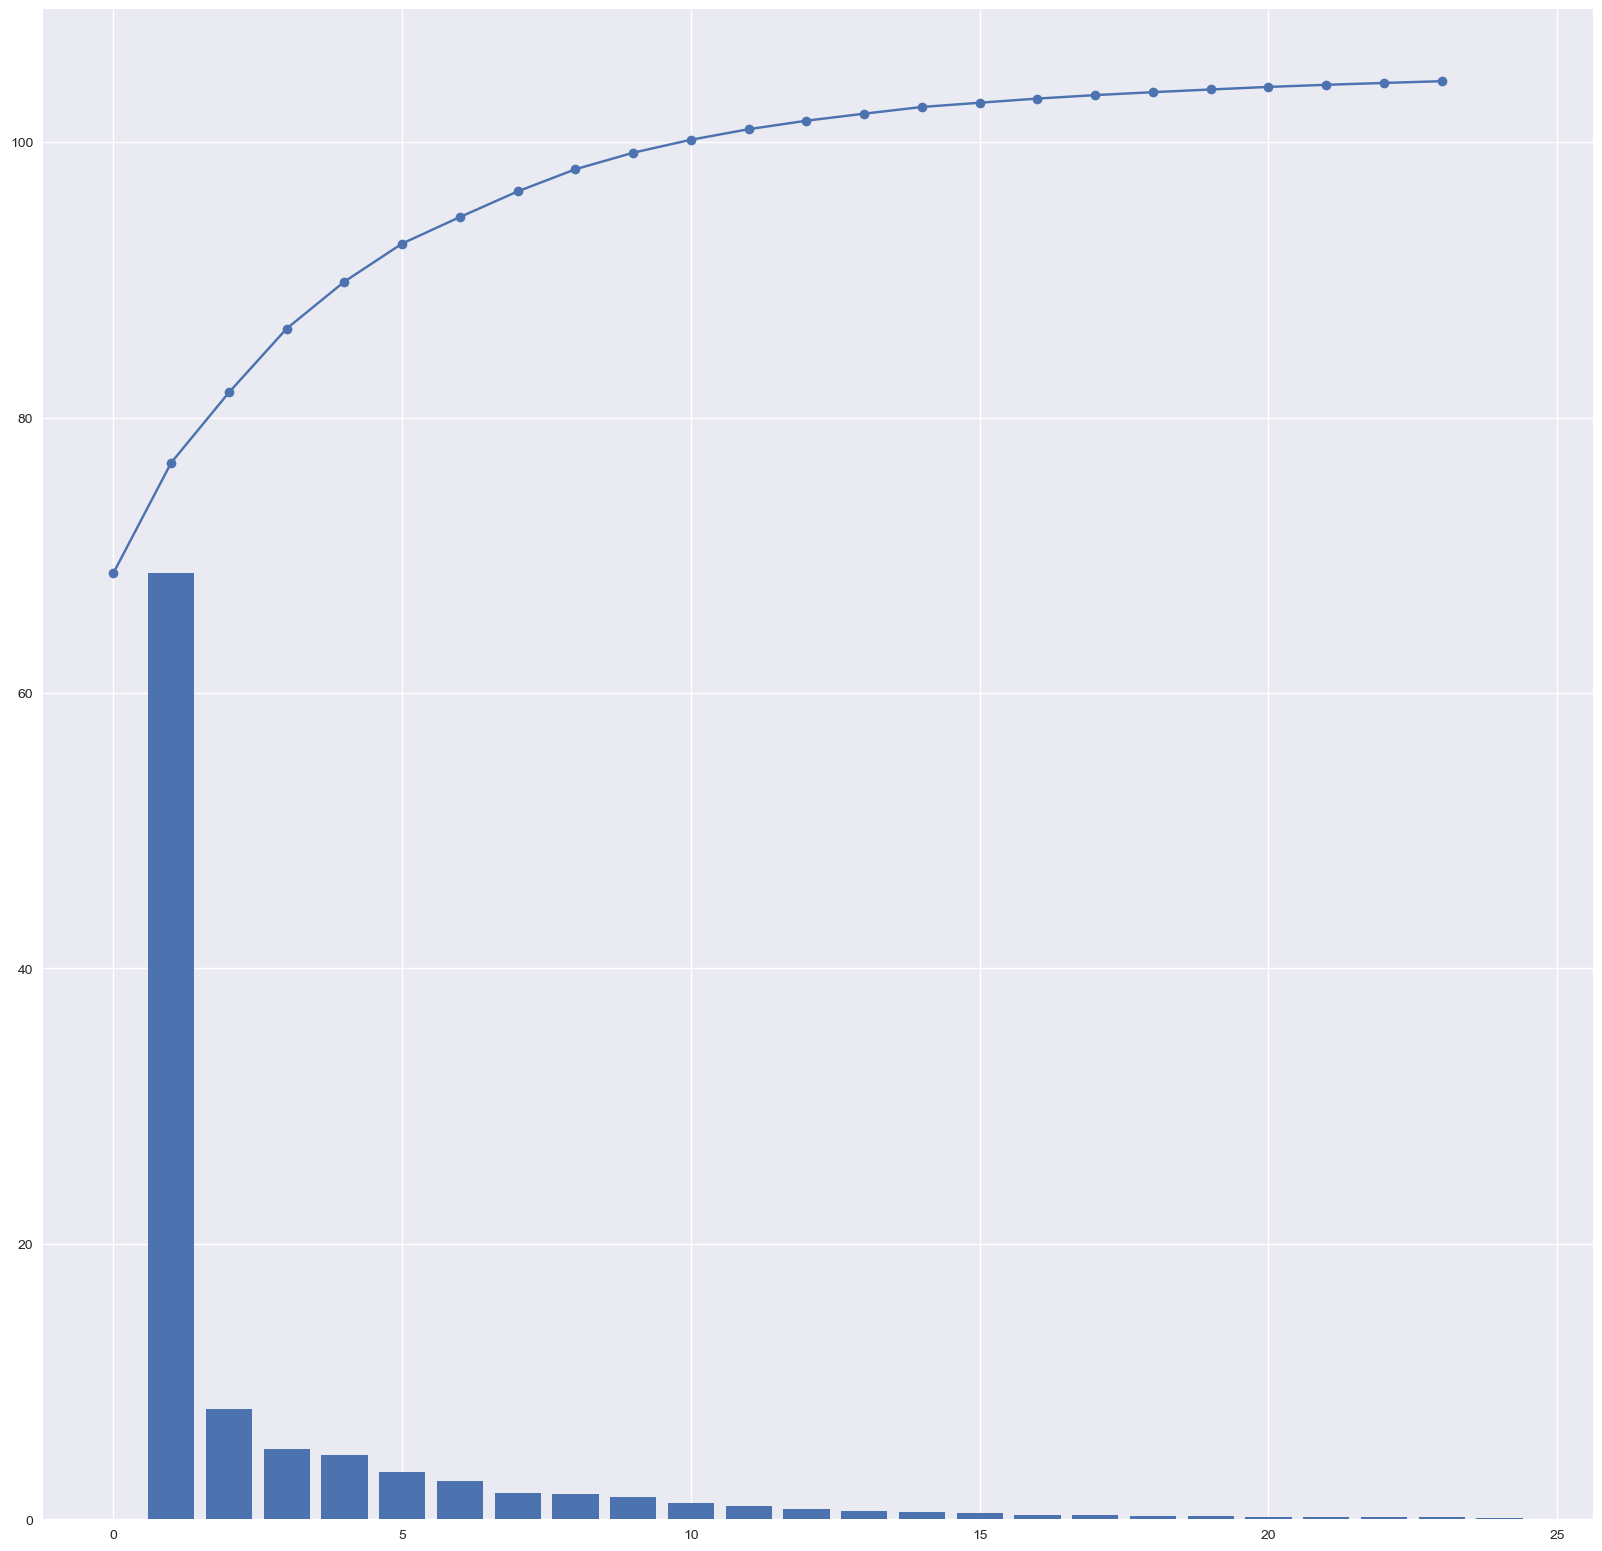

In [35]:
plt.bar(range(1,len(pca_transform.explained_variance_) +1),
        pca_transform.explained_variance_);plt.plot(np.cumsum(pca_transform.explained_variance_), 'o-');

In [33]:
# Incorporar START YEAR nuevamente 
x_train = pd.DataFrame(x_numeric_pca_train)
x_train['START YEAR'] = x_train_pre.loc[:,'START YEAR'].values

x_test = pd.DataFrame(x_numeric_pca_test)
x_test['START YEAR'] = x_test_pre.loc[:,'START YEAR'].values

In [34]:
x_train.head

<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0    -6.690312  0.323381 -0.152861 -2.261961 -0.314552 -1.632112  0.865759   
1     0.244607 -3.159335  0.752970 -2.908533 -0.931662  1.606545 -0.538587   
2   -10.819576  0.056690  0.825944  2.438303 -1.152434 -0.560906  1.064032   
3   -11.293394 -0.127107  2.285716  1.945188 -1.110087  0.658373  0.443875   
4    -6.612175  0.196978 -0.379597 -1.919161  0.928900 -1.649443  0.442876   
5   -12.346788  2.815878  5.658316  2.938877 -0.246285 -1.644025  0.194250   
6    13.042540  3.841352 -0.971343  2.795573 -2.969682 -1.172188  1.347269   
7     3.066254 -3.629178  0.461717 -0.329162 -2.467177  1.435739 -0.729125   
8     1.643349 -3.363504 -2.003647  0.815805 -1.727948 -0.504420 -1.377011   
9    11.368625  2.691230  1.143868  0.183645 -2.966147  2.872752  1.223034   
10  -12.215860  2.165129  4.743692  4.517758  0.614452 -0.009587 -0.930995   
11    4.229069 -3.183433  1.415412

In [36]:
x_test.head

<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0    -9.593035  0.890841 -0.077830  2.168462 -0.675432 -0.536408 -0.465934   
1   -12.248156  1.530127  5.006468  3.137271  0.903605 -1.689873 -0.661682   
2    -8.264078 -1.288511  1.547083 -0.707661  0.585582 -1.660316  1.130912   
3    -3.799332  4.467187 -1.592220 -3.517345 -0.713415 -1.154724 -0.274764   
4    -1.841493  2.437797 -2.446915  0.535212 -2.696117 -0.168243 -1.712406   
5    -6.681660  0.509479  0.386353 -2.401593 -0.909464 -1.686711  1.447443   
6     1.516314 -3.213373 -1.734525  0.579875 -2.689812 -0.554344 -1.164038   
7     8.324503  0.274683  1.952648 -3.276739 -0.408653 -3.359769  1.991251   
8    -3.954700  4.020061 -4.621222  0.365155  0.363247  0.165306 -1.370741   
9     9.893999  1.279467  1.912687 -2.496237  0.696735  2.539888  4.470117   
10   -7.841630 -1.143590  1.359994 -1.349958 -0.844175  0.904812  0.966638   
11    2.187207 -3.587557  0.100964

In [37]:
x_test.shape

(112, 25)

In [38]:
x_train.shape

(260, 25)

## 4.- Modelamiento
1. Realice una regresión lineal para poder predecir `COMPLETION YEAR`.
2. Reporte la cantidad de varianza explicada por el modelo ($R^2$).
3. Realice un dotplot entre `COMPLETION YEAR` y `START YEAR`, le hace sentido el valor que observó de varianza explicada?.

In [ ]:
plt.plot(df['START YEAR'], df['COMPLETION YEAR'], 'o');

In [40]:
#modelo de regresion lineal

lin_reg = LinearRegression().fit(x_train, y_train)
lin_reg_preds = lin_reg.predict(x_test)

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2 Score: {}'.format(r2_score(y_test, lin_reg_preds)))
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, lin_reg_preds)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, lin_reg_preds)))

R2 Score: 0.9946809879031737
Mean Absolute Error: 0.25348670727423883
Mean Squared Error: 0.09032440703168418


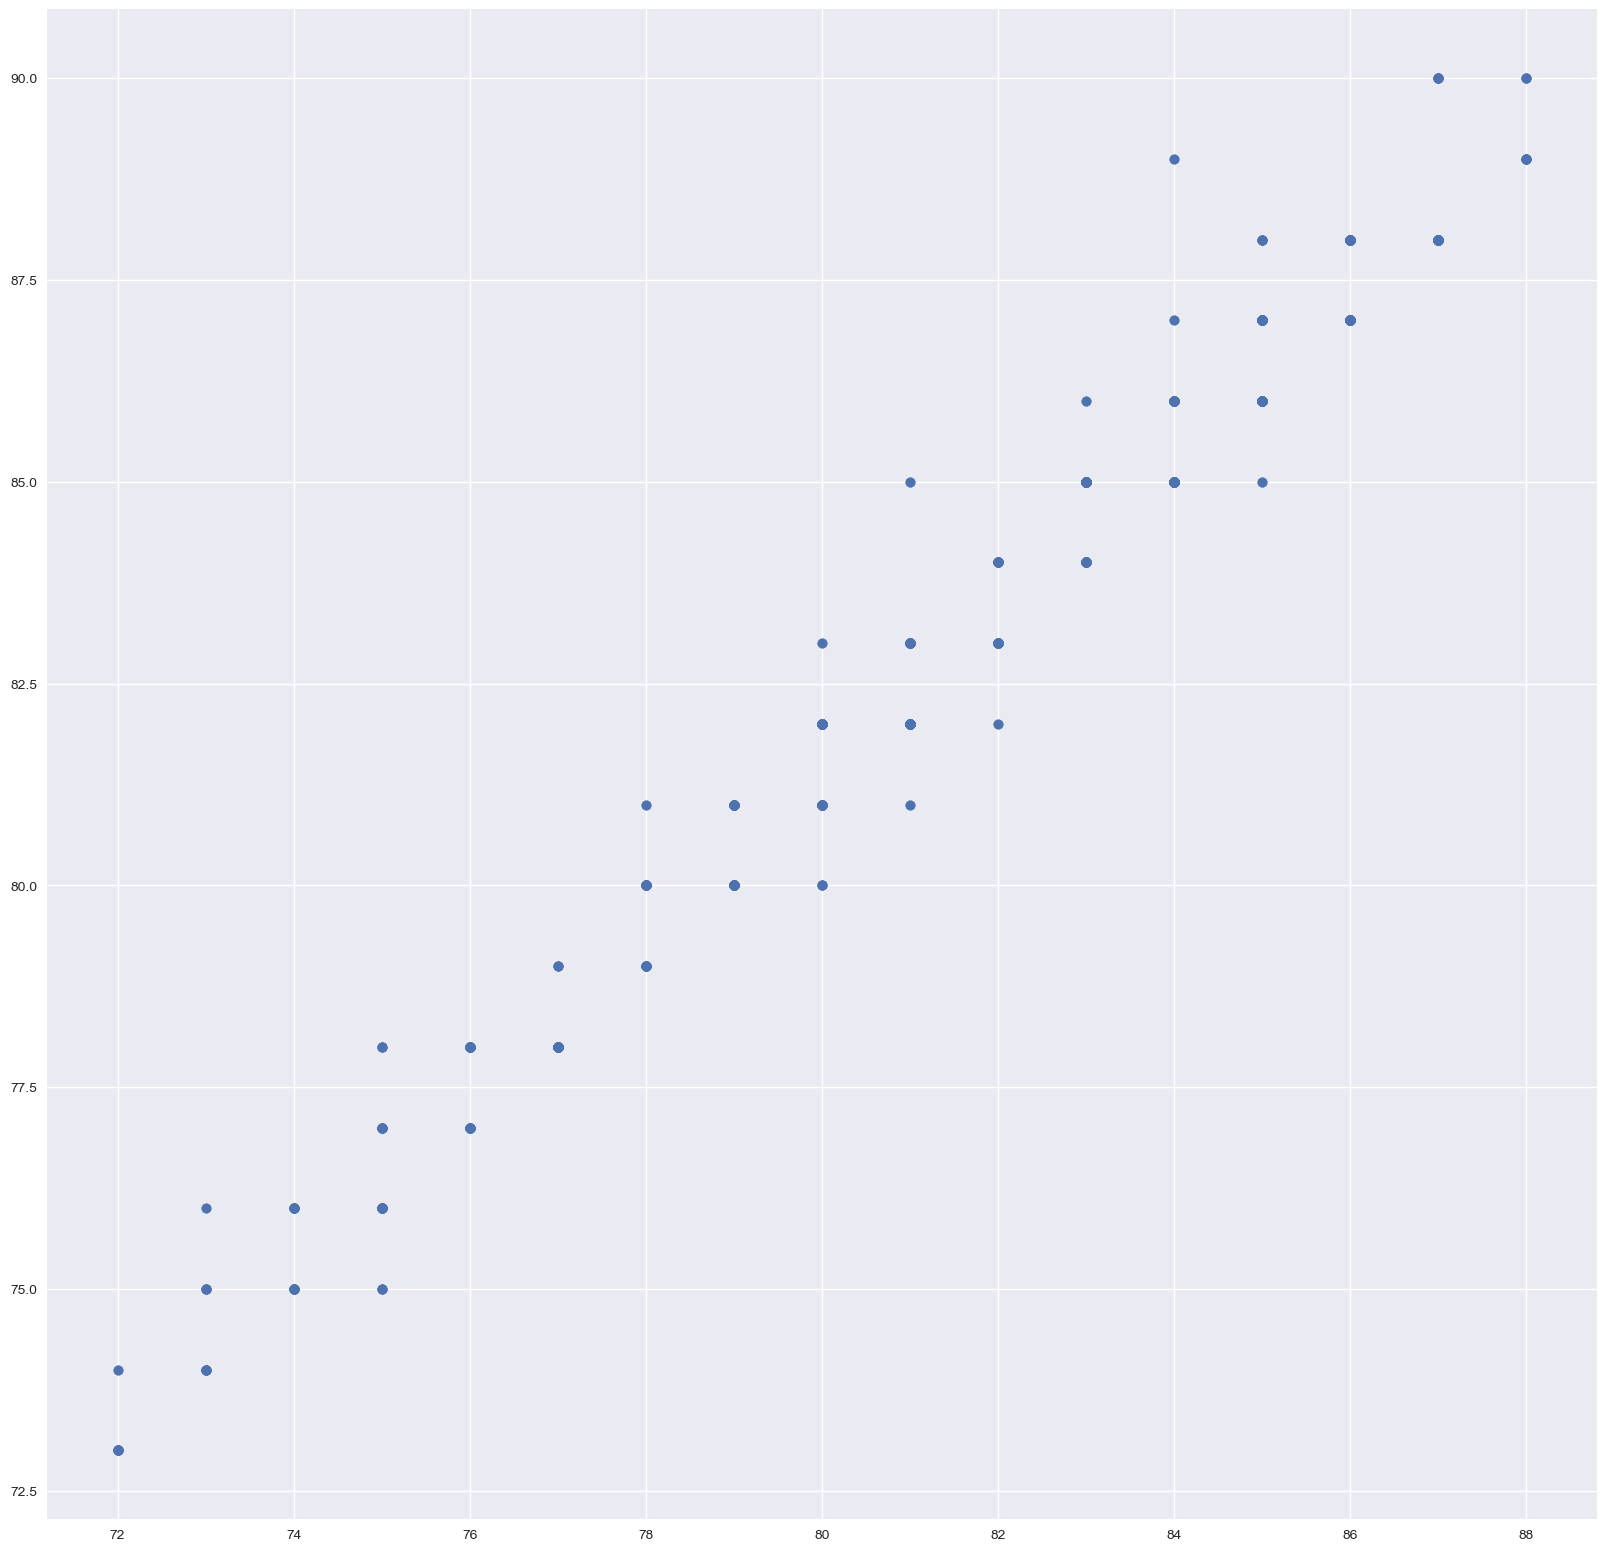

In [39]:
plt.scatter(df['START YEAR'], df['COMPLETION YEAR'])

## 5.- KMeans Clustering

Realice clustering sobre el conjunto de datos, en este caso, clustering lo ocuparemos para __descubrir información__, no para predecir algún valor.

1. A partir del dataset original (completo), escalelo con `StandarScaler`. Por qué necesitamos esto?
2. Instancie un objeto `KMeans` del módulo `sklearn.cluster`.
3. Entrene `KMeans` sobre el conjunto de datos:
> * Aplique `KMeans` con 2, 5, 7 y 10 n_clusters.
